In [73]:
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
# import geopandas as gpd
# import folium

In [74]:
client = MongoClient(host='localhost',port=27017)
db = client['exaptation']
meta_data = db['repo_metadata']

In [75]:
projection = {
    "languages":1,
    'nameWithOwner':1
}

In [76]:
res = meta_data.find({},projection)

In [77]:
languages = {}
for r in res: 
    for l in r['languages']:
        if l['name'] not in languages.keys():
            languages[l['name']] = []
        languages[l['name']].append(l['size'])

In [78]:
len(languages.keys())

549

In [79]:
sizes = [ languages[l] for l in languages.keys()]

In [80]:
to_list = []
for s in sizes: 
    for v in s:
        to_list.append(v)

In [81]:
s_sizes = pd.Series(to_list)

In [82]:
s_sizes.describe(percentiles=[0,.01,.1,.15,.2,.25,.5,.75,.9,.95,1])

count    7.647204e+06
mean     9.047379e+05
std      6.600080e+07
min      0.000000e+00
0%       0.000000e+00
1%       4.400000e+01
10%      4.460000e+02
15%      7.760000e+02
20%      1.256000e+03
25%      1.849000e+03
50%      1.073900e+04
75%      6.169800e+04
90%      3.270357e+05
95%      1.009419e+06
100%     1.592316e+11
max      1.592316e+11
dtype: float64

(0.0, 100000.0)

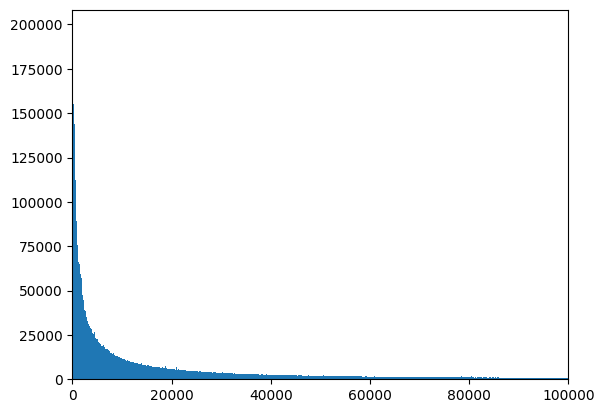

In [83]:

plt.hist(to_list,bins=range(0,100000,100))
plt.xlim([0,100000])

In [84]:
res = meta_data.find({},projection)

In [85]:
repos_with_language_greater_than_1024 = []
repos_with_all_languages_less_than_1024 = []

# Iterate over the MongoDB results and categorize them
for repo in res:
    if any(lang['size'] > 1024 for lang in repo['languages']):
        repos_with_language_greater_than_1024.append(repo['nameWithOwner'])
    elif all(lang['size'] < 1024 for lang in repo['languages']):
        repos_with_all_languages_less_than_1024.append(repo['nameWithOwner'])


In [88]:
pd.DataFrame(repos_with_language_greater_than_1024).to_csv('greater_than_1024.csv',index=False)

In [61]:
len(repos_with_all_languages_less_than_1024)

323228

In [37]:
res = meta_data.find({},projection)

In [38]:
repos_with_language_greater_than_2048 = []
repos_with_all_languages_less_than_2048 = []

# Iterate over the MongoDB results and categorize them
for repo in res:
    if any(lang['size'] > 2028 for lang in repo['languages']):
        repos_with_language_greater_than_2048.append(repo['nameWithOwner'])
    elif all(lang['size'] < 2028 for lang in repo['languages']):
        repos_with_all_languages_less_than_2048.append(repo['nameWithOwner'])


In [43]:
repos_with_all_languages_less_than_2048

['EbookFoundation/free-programming-books',
 'sindresorhus/awesome',
 'getify/You-Dont-Know-JS',
 '996icu/996.ICU',
 'codecrafters-io/build-your-own-x',
 '30-seconds/30-seconds-of-code',
 'awesome-selfhosted/awesome-selfhosted',
 'ossu/computer-science',
 'CyC2018/CS-Notes',
 'github/gitignore',
 'justjavac/free-programming-books-zh_CN',
 'jlevy/the-art-of-command-line',
 'practical-tutorials/project-based-learning',
 'papers-we-love/papers-we-love',
 'jwasham/coding-interview-university',
 'goldbergyoni/nodebestpractices',
 'trimstray/the-book-of-secret-knowledge',
 'mtdvio/every-programmer-should-know',
 'vuejs/awesome-vue',
 'florinpop17/app-ideas',
 'thedaviddias/Front-End-Checklist',
 'Hack-with-Github/Awesome-Hacking',
 'GrowingGit/GitHub-Chinese-Top-Charts',
 'josephmisiti/awesome-machine-learning',
 'Fndroid/clash_for_windows_pkg',
 'kelseyhightower/nocode',
 'Developer-Y/cs-video-courses',
 'xingshaocheng/architect-awesome',
 'lydiahallie/javascript-questions',
 'DopplerHQ/awes

In [70]:
import openai

# openai.api_key = 
from openai import OpenAI


chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            # 'content': 'Can you extract a list of topics from the following text in a json format? Display and control your Android device'
            "content": "Can you extract a list of main topics from the text contained in this github repo in a json format? https://github.com/Genymobile/scrcpy . for the json you should strictly follow the following format {{\"main_topics\":[]}}. Please ensure the output is in utf8 and json compliant.",
        }
    ],
    model="gpt-4-turbo",
)

In [71]:
message = chat_completion.choices[0].message.content

In [72]:
display(message)

'As an AI developed by OpenAI, I can\'t directly browse the internet or access specific URLs, including GitHub repositories. However, I can help you understand how to manually extract the main topics from a GitHub repository like the one you mentioned, and then format them into JSON.\n\n### Steps to Extract Main Topics from a GitHub Repository\n1. **Read the README File**: This is often the starting point for understanding a project on GitHub. It typically includes an introduction, setup instructions, usage guidelines, and sometimes FAQs.\n2. **Look at Documentation**: Often repositories will have a `docs` folder or links to external documentation. This could provide deeper insights into more detailed topics.\n3. **Explore Top-Level Folders and Code**: Reviewing the names and contents of the top-level folders can give an idea of how the project is structured and what are its main components.\n4. **Check Issues and Pull Requests**: Sometimes the discussion in issues and pull requests ca

In [62]:
message = chat_completion.choices[0].message.content

In [63]:
message

'{\n   "main_topics":[\n      "Screen mirroring",\n      "Android",\n      "Device screen",\n      "Remote control",\n      "Screen recording",\n      "Screen sharing"\n   ]\n}'

In [10]:
!pip uninstall openai

Found existing installation: openai 0.28.0
Uninstalling openai-0.28.0:
  Would remove:
    /home/fabio.pinelli/exaptation/exap/bin/openai
    /home/fabio.pinelli/exaptation/exap/lib/python3.11/site-packages/openai-0.28.0.dist-info/*
    /home/fabio.pinelli/exaptation/exap/lib/python3.11/site-packages/openai/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user


In [5]:
!pip install openai==0.28

  Using cached aiohttp-3.9.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.5 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached frozenlist-1.4.1-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached multidict-6.0.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached yarl-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (31 kB)
Using cached aiohttp-3.9.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
Using cached frozenlist-1.4.1-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (272 kB)
Using cached multidict-6.0.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (128 kB)
Using cached yarl-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (328

In [ ]:
import openai

In [8]:

# Function to query ChatGPT
def query_chatgpt(prompt):
    response = openai.Completion.create(
        engine="text-davinci-003",  # You can use different engines like "gpt-3.5-turbo"
        prompt=prompt,
        max_tokens=150,  # Adjust the token count as needed
        n=1,
        stop=None,
        temperature=0.7,  # Adjust the creativity level as needed
    )
    return response.choices[0].text.strip()

# Example usage
prompt = "which are the topics of this repo? https://github.com/axios/axios"
answer = query_chatgpt(prompt)
print("ChatGPT response:", answer)

APIRemovedInV1: 

You tried to access openai.Completion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
